In [1]:
import pandas as pd
pd.options.display.max_colwidth = 300
pd.options.display.max_columns = 300
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

DATA_DIR=Path("../data")
nm2mol = 1E9

In [2]:
df = pd.read_csv("C:/Users/rbachorz/Projects/AR/fromMarcin/AR_IC50_processed_MRedit_RB.csv", sep="|")
df.head(2)

,comp_molregno,act_standard_units,act_standard_type,act_activity_comment,act_bao_endpoint,act_type,ass_assay_id,ass_description,ass_expert_selection,ass_assay_type,ass_assay_category,ass_chembl_id,doc_doi,doc_pubmed_id,doc_chembl_id,doc_title,doc_doc_type,doc_abstract,doc_patent_id,coms_canonical_smiles,comp_full_molformula,mold_chembl_id,act_0,act_1,act_2,act_3,act_4,act_5,act_6,act_7,act_8,act_9,act_10,act_11,act_12,act_13,act_14,act_15,act_16,act_17,act_18,act_19,act_20,act_21,act_22,act_23,act_24,act_25,act_26,act_27,act_28,act_29,act_30,act_31,act_32,act_33,act_34,act_35,act_36,act_37,act_38,act_39,act_40,act_41,act_42,act_43,act_44,act_45,act_46,act_47,act_48,act_49,act_50,act_51,act_52,act_53,act_54,act_std,act_min,act_mean,act_median,act_max,log_act_mean,log_act_median,log_act_min,pIC50_mean,pIC50_median,pIC50_min,meas_count,class_activity_mean_1000,class_activity_median_1000,class_activity_min_1000,class_activity_max_1000,class_activity_mean_2000,class_activity_median_2000,class_activity_min_2000,class_activity_max_2000,class_activity_mean_3000,class_activity_median_3000,class_activity_min_3000,class_activity_max_3000,class_activity_mean_4000,class_activity_median_4000,class_activity_min_4000,class_activity_max_4000,class_activity_mean_5000,class_activity_median_5000,class_activity_min_5000,class_activity_max_5000
0,716,nM,IC50,NaN,"Entry 0: BAO_0000190, Entry 1: BAO_0000190,",IC50,"Entry 0: 36116, Entry 1: 36117,","Entry 0: In vitro antagonistic activity against human androgen receptor using cotransfection assay in CV-1 cells; Not active., Entry 1: In vitro binding affinity at human androgen receptor transfected into COS cells.,","0,1","Entry 0: F, Entry 1: B,",NaN,"Entry 0: CHEMBL648081, Entry 1: CHEMBL648082,","Entry 0: 10.1016/s0960-894x(99)00118-3, Entry 1: 10.1016/s0960-894x(99)00118-3,","Entry 0: 10230628, Entry 1: 10230628,","Entry 0: CHEMBL1132082, Entry 1: CHEMBL1132082,","Entry 0: Nonsteroidal androgen receptor agonists based on 4-(trifluoromethyl)-2H-pyrano[3,2-g]quinolin-2-one., Entry 1: Nonsteroidal androgen receptor agonists based on 4-(trifluoromethyl)-2H-pyrano[3,2-g]quinolin-2-one.,","Entry 0: PUBLICATION, Entry 1: PUBLICATION,","Entry 0: A series of 2H-pyrano[3,2-g]quinolin-2-ones was prepared and tested for the ability to modulate the transcriptional activity of the human androgen receptor (hAR). The parent compound, 4-(trifluoromethyl)-2H-pyrano[3,2-g]quinolin-2-one, displayed moderate interaction with hAR, but substi...",NaN,CCC1CCNc2cc3oc(=O)cc(C(F)(F)F)c3cc21,C15H14F3NO2,CHEMBL6843,1.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.50000,1.0,5.500,5.5,10.0,0.740363,0.740363,0.0,8.259637,8.259637,9.0,2,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE
1,717,nM,IC50,325861.0,"Entry 0: BAO_0000190, Entry 1: BAO_0000190, Entry 2: BAO_0000190, Entry 3: BAO_0000190, Entry 4: BAO_0000190, Entry 5: BAO_0000190, Entry 6: BAO_0000190, Entry 7: BAO_0000190, Entry 8: BAO_0000190, Entry 9: BAO_0000190, Entry 10: BAO_0000190, Entry 11: BAO_0000190, Entry 12: BAO_0000190, Entry 1...",mix,"Entry 0: 36100, Entry 1: 36107, Entry 2: 36115, Entry 3: 36117, Entry 4: 36124, Entry 5: 305503, Entry 6: 312479, Entry 7: 312709, Entry 8: 312710, Entry 9: 312787, Entry 10: 312999, Entry 11: 317578, Entry 12: 327103, Entry 13: 312372, Entry 14: 432232, Entry 15: 432234, Entry 16: 438255, Entry...","Entry 0: Antagonistic activity (IC50) against human androgen receptor (hAR) in co-transfected CV-1 cell, Entry 1: Antagonistic activity against human androgen receptor (hAR) in co-transfected CV-1 cells., Entry 2: In vitro agonistic activity against human androgen receptor (hAR) expressed in CV-...","0,1,2,3,4,5,7,12,13,16,22,24,25,43,","Entry 0: F, Entry 1: F, Entry 2: F

# neglect the rows

In [3]:
df = df[~(df["ass_expert_selection"]=="discard")]
df.head(2)

,comp_molregno,act_standard_units,act_standard_type,act_activity_comment,act_bao_endpoint,act_type,ass_assay_id,ass_description,ass_expert_selection,ass_assay_type,ass_assay_category,ass_chembl_id,doc_doi,doc_pubmed_id,doc_chembl_id,doc_title,doc_doc_type,doc_abstract,doc_patent_id,coms_canonical_smiles,comp_full_molformula,mold_chembl_id,act_0,act_1,act_2,act_3,act_4,act_5,act_6,act_7,act_8,act_9,act_10,act_11,act_12,act_13,act_14,act_15,act_16,act_17,act_18,act_19,act_20,act_21,act_22,act_23,act_24,act_25,act_26,act_27,act_28,act_29,act_30,act_31,act_32,act_33,act_34,act_35,act_36,act_37,act_38,act_39,act_40,act_41,act_42,act_43,act_44,act_45,act_46,act_47,act_48,act_49,act_50,act_51,act_52,act_53,act_54,act_std,act_min,act_mean,act_median,act_max,log_act_mean,log_act_median,log_act_min,pIC50_mean,pIC50_median,pIC50_min,meas_count,class_activity_mean_1000,class_activity_median_1000,class_activity_min_1000,class_activity_max_1000,class_activity_mean_2000,class_activity_median_2000,class_activity_min_2000,class_activity_max_2000,class_activity_mean_3000,class_activity_median_3000,class_activity_min_3000,class_activity_max_3000,class_activity_mean_4000,class_activity_median_4000,class_activity_min_4000,class_activity_max_4000,class_activity_mean_5000,class_activity_median_5000,class_activity_min_5000,class_activity_max_5000
0,716,nM,IC50,NaN,"Entry 0: BAO_0000190, Entry 1: BAO_0000190,",IC50,"Entry 0: 36116, Entry 1: 36117,","Entry 0: In vitro antagonistic activity against human androgen receptor using cotransfection assay in CV-1 cells; Not active., Entry 1: In vitro binding affinity at human androgen receptor transfected into COS cells.,","0,1","Entry 0: F, Entry 1: B,",NaN,"Entry 0: CHEMBL648081, Entry 1: CHEMBL648082,","Entry 0: 10.1016/s0960-894x(99)00118-3, Entry 1: 10.1016/s0960-894x(99)00118-3,","Entry 0: 10230628, Entry 1: 10230628,","Entry 0: CHEMBL1132082, Entry 1: CHEMBL1132082,","Entry 0: Nonsteroidal androgen receptor agonists based on 4-(trifluoromethyl)-2H-pyrano[3,2-g]quinolin-2-one., Entry 1: Nonsteroidal androgen receptor agonists based on 4-(trifluoromethyl)-2H-pyrano[3,2-g]quinolin-2-one.,","Entry 0: PUBLICATION, Entry 1: PUBLICATION,","Entry 0: A series of 2H-pyrano[3,2-g]quinolin-2-ones was prepared and tested for the ability to modulate the transcriptional activity of the human androgen receptor (hAR). The parent compound, 4-(trifluoromethyl)-2H-pyrano[3,2-g]quinolin-2-one, displayed moderate interaction with hAR, but substi...",NaN,CCC1CCNc2cc3oc(=O)cc(C(F)(F)F)c3cc21,C15H14F3NO2,CHEMBL6843,1.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.50000,1.0,5.500,5.5,10.0,0.740363,0.740363,0.0,8.259637,8.259637,9.0,2,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE
1,717,nM,IC50,325861.0,"Entry 0: BAO_0000190, Entry 1: BAO_0000190, Entry 2: BAO_0000190, Entry 3: BAO_0000190, Entry 4: BAO_0000190, Entry 5: BAO_0000190, Entry 6: BAO_0000190, Entry 7: BAO_0000190, Entry 8: BAO_0000190, Entry 9: BAO_0000190, Entry 10: BAO_0000190, Entry 11: BAO_0000190, Entry 12: BAO_0000190, Entry 1...",mix,"Entry 0: 36100, Entry 1: 36107, Entry 2: 36115, Entry 3: 36117, Entry 4: 36124, Entry 5: 305503, Entry 6: 312479, Entry 7: 312709, Entry 8: 312710, Entry 9: 312787, Entry 10: 312999, Entry 11: 317578, Entry 12: 327103, Entry 13: 312372, Entry 14: 432232, Entry 15: 432234, Entry 16: 438255, Entry...","Entry 0: Antagonistic activity (IC50) against human androgen receptor (hAR) in co-transfected CV-1 cell, Entry 1: Antagonistic activity against human androgen receptor (hAR) in co-transfected CV-1 cells., Entry 2: In vitro agonistic activity against human androgen receptor (hAR) expressed in CV-...","0,1,2,3,4,5,7,12,13,16,22,24,25,43,","Entry 0: F, Entry 1: F, Entry 2: F

In [4]:
def create_relevant_activity_cols(x):
    ret = ["act_"+str(item) for item in x.split(",") if str(item) != ""]
    return ret

In [5]:
df["ass_expert_selection_list"] = df["ass_expert_selection"].apply(create_relevant_activity_cols)

In [6]:
expert_mean = []
expert_median = []
expert_min = []
expert_max = []
for index, row in df.iterrows():
    relevant_activities = row["ass_expert_selection_list"]
    expert_mean.append(np.mean(row[relevant_activities]))
    expert_median.append(np.nanmedian(row[relevant_activities]))
    expert_min.append(np.min(row[relevant_activities]))
    expert_max.append(np.max(row[relevant_activities]))
df["act_mean_expert"] = expert_mean
df["act_median_expert"] = expert_median
df["act_min_expert"] = expert_min
df["act_max_expert"] = expert_max


In [7]:
df["pIC50_expert_mean"] = df["act_mean_expert"].apply(lambda x: -1.0*np.log10(x / nm2mol))
df["pIC50_expert_median"] = df["act_median_expert"].apply(lambda x: -1.0*np.log10(x / nm2mol))
df["pIC50_expert_min"] = df["act_min_expert"].apply(lambda x: -1.0*np.log10(x / nm2mol))
df["pIC50_expert_max"] = df["act_max_expert"].apply(lambda x: -1.0*np.log10(x / nm2mol))

<Axes: >

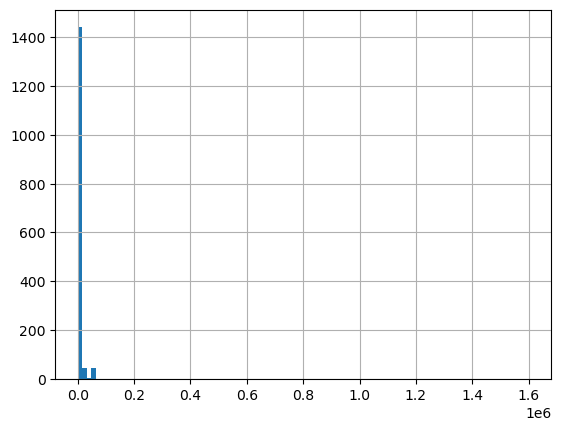

In [8]:
df["act_mean"].hist(bins=100)

Text(0.5, 1.0, 'Conflicting IC50 values')

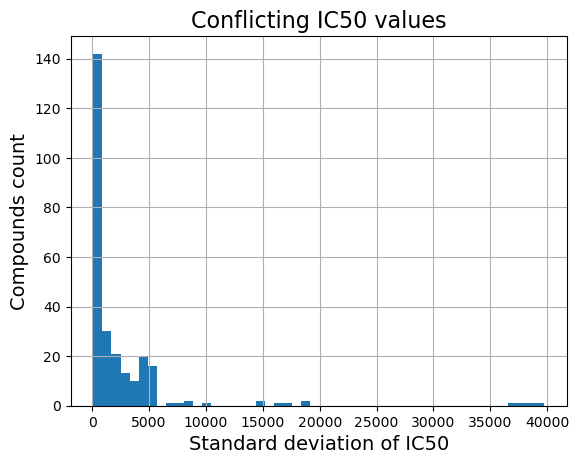

In [9]:
data = df[df["act_std"] > 100]["act_std"]
plt.hist(data, bins=50)
plt.grid()
plt.xlabel("Standard deviation of IC50", fontsize=14)
plt.ylabel("Compounds count", fontsize=14)
plt.title("Conflicting IC50 values", fontsize=16)
# plt.savefig("C:\\Users\\rbachorz\\Projects\\rorgammaaidd\\presentation\\IC50_std_distribution.svg", dpi=200)

In [10]:
df.shape[0]/data.shape[0]

5.760299625468165

In [11]:
# df["act_mean_expert"] = df[act_cols+["Qualitative assay assessment"]].apply(mean_incorporate_expert, axis=1)
# df["act_median_expert"] = df[act_cols+["Qualitative assay assessment"]].apply(median_incorporate_expert, axis=1)
# df["act_min_expert"] = df[act_cols+["Qualitative assay assessment"]].apply(min_incorporate_expert, axis=1)

# df["pIC50_mean_expert"] = df["act_mean_expert"].apply(lambda x: -1.0*np.log10(x/nm2mol))
# df["pIC50_median_expert"] = df["act_median_expert"].apply(lambda x: -1.0*np.log10(x/nm2mol))
# df["pIC50_min_expert"] = df["act_min_expert"].apply(lambda x: -1.0*np.log10(x/nm2mol))

In [12]:
activity_thresholds = [1000, 2000, 3000, 4000, 5000]
for at in activity_thresholds:
    df["class_activity_mean_"+str(at)] = df["act_mean"].apply(lambda x: "ACTIVE" if x < at else "INACTIVE")
    df["class_activity_mean_expert_"+str(at)] = df["act_mean_expert"].apply(lambda x: "ACTIVE" if x < at else "INACTIVE")

    df["class_activity_median_"+str(at)] = df["act_median"].apply(lambda x: "ACTIVE" if x < at else "INACTIVE")
    df["class_activity_median_expert_"+str(at)] = df["act_median_expert"].apply(lambda x: "ACTIVE" if x < at else "INACTIVE")

    df["class_activity_min_"+str(at)] = df["act_min"].apply(lambda x: "ACTIVE" if x < at else "INACTIVE")
    df["class_activity_min_expert_"+str(at)] = df["act_min_expert"].apply(lambda x: "ACTIVE" if x < at else "INACTIVE")

    df["class_activity_max_"+str(at)] = df["act_max"].apply(lambda x: "ACTIVE" if x < at else "INACTIVE")
    df["class_activity_min_expert_"+str(at)] = df["act_min_expert"].apply(lambda x: "ACTIVE" if x < at else "INACTIVE")

In [13]:
df

,comp_molregno,act_standard_units,act_standard_type,act_activity_comment,act_bao_endpoint,act_type,ass_assay_id,ass_description,ass_expert_selection,ass_assay_type,ass_assay_category,ass_chembl_id,doc_doi,doc_pubmed_id,doc_chembl_id,doc_title,doc_doc_type,doc_abstract,doc_patent_id,coms_canonical_smiles,comp_full_molformula,mold_chembl_id,act_0,act_1,act_2,act_3,act_4,act_5,act_6,act_7,act_8,act_9,act_10,act_11,act_12,act_13,act_14,act_15,act_16,act_17,act_18,act_19,act_20,act_21,act_22,act_23,act_24,act_25,act_26,act_27,act_28,act_29,act_30,act_31,act_32,act_33,act_34,act_35,act_36,act_37,act_38,act_39,act_40,act_41,act_42,act_43,act_44,act_45,act_46,act_47,act_48,act_49,act_50,act_51,act_52,act_53,act_54,act_std,act_min,act_mean,act_median,act_max,log_act_mean,log_act_median,log_act_min,pIC50_mean,pIC50_median,pIC50_min,meas_count,class_activity_mean_1000,class_activity_median_1000,class_activity_min_1000,class_activity_max_1000,class_activity_mean_2000,class_activity_median_2000,class_activity_min_2000,class_activity_max_2000,class_activity_mean_3000,class_activity_median_3000,class_activity_min_3000,class_activity_max_3000,class_activity_mean_4000,class_activity_median_4000,class_activity_min_4000,class_activity_max_4000,class_activity_mean_5000,class_activity_median_5000,class_activity_min_5000,class_activity_max_5000,ass_expert_selection_list,act_mean_expert,act_median_expert,act_min_expert,act_max_expert,pIC50_expert_mean,pIC50_expert_median,pIC50_expert_min,pIC50_expert_max,class_activity_mean_expert_1000,class_activity_median_expert_1000,class_activity_min_expert_1000,class_activity_mean_expert_2000,class_activity_median_expert_2000,class_activity_min_expert_2000,class_activity_mean_expert_3000,class_activity_median_expert_3000,class_activity_min_expert_3000,class_activity_mean_expert_4000,class_activity_median_expert_4000,class_activity_min_expert_4000,class_activity_mean_expert_5000,class_activity_median_expert_5000,class_activity_min_expert_5000
0,716,nM,IC50,NaN,"Entry 0: BAO_0000190, Entry 1: BAO_0000190,",IC50,"Entry 0: 36116, Entry 1: 36117,","Entry 0: In vitro antagonistic activity against human androgen receptor using cotransfection assay in CV-1 cells; Not active., Entry 1: In vitro binding affinity at human androgen receptor transfected into COS cells.,","0,1","Entry 0: F, Entry 1: B,",NaN,"Entry 0: CHEMBL648081, Entry 1: CHEMBL648082,","Entry 0: 10.1016/s0960-894x(99)00118-3, Entry 1: 10.1016/s0960-894x(99)00118-3,","Entry 0: 10230628, Entry 1: 10230628,","Entry 0: CHEMBL1132082, Entry 1: CHEMBL1132082,","Entry 0: Nonsteroidal androgen receptor agonists based on 4-(trifluoromethyl)-2H-pyrano[3,2-g]quinolin-2-one., Entry 1: Nonsteroidal androgen receptor agonists based on 4-(trifluoromethyl)-2H-pyrano[3,2-g]quinolin-2-one.,","Entry 0: PUBLICATION, Entry 1: PUBLICATION,","Entry 0: A series of 2H-pyrano[3,2-g]quinolin-2-ones was prepared and tested for the ability to modulate the transcriptional activity of the human androgen receptor (hAR). The parent compound, 4-(trifluoromethyl)-2H-pyrano[3,2-g]quinolin-2-one, displayed moderate interaction with hAR, but substi...",NaN,CCC1CCNc2cc3oc(=O)cc(C(F)(F)F)c3cc21,C15H14F3NO2,CHEMBL6843,1.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.50000,1.0,5.500,5.5,10.0,0.740363,0.740363,0.000000,8.259637,8.259637,9.000000,2,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,"[act_0, act_1]",5.500000,5.5,1.0,10.0,8.259637,8.259637,9.000000,8.000000,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE
1,717,nM,IC50,325861.0,"Entry 0: BAO_0000190, Entry 1: BAO_0000190, Entry 2: BAO_0000190, Entry 3: BAO_0000190, Entry 4: BAO_0000190, Entry 5: BAO_0000190, Entry 6: BAO_

In [14]:
df.columns

Index(['comp_molregno', 'act_standard_units', 'act_standard_type',
       'act_activity_comment', 'act_bao_endpoint', 'act_type', 'ass_assay_id',
       'ass_description', 'ass_expert_selection', 'ass_assay_type',
       ...
       'class_activity_min_expert_2000', 'class_activity_mean_expert_3000',
       'class_activity_median_expert_3000', 'class_activity_min_expert_3000',
       'class_activity_mean_expert_4000', 'class_activity_median_expert_4000',
       'class_activity_min_expert_4000', 'class_activity_mean_expert_5000',
       'class_activity_median_expert_5000', 'class_activity_min_expert_5000'],
      dtype='object', length=133)

In [15]:
df.head(1)

,comp_molregno,act_standard_units,act_standard_type,act_activity_comment,act_bao_endpoint,act_type,ass_assay_id,ass_description,ass_expert_selection,ass_assay_type,ass_assay_category,ass_chembl_id,doc_doi,doc_pubmed_id,doc_chembl_id,doc_title,doc_doc_type,doc_abstract,doc_patent_id,coms_canonical_smiles,comp_full_molformula,mold_chembl_id,act_0,act_1,act_2,act_3,act_4,act_5,act_6,act_7,act_8,act_9,act_10,act_11,act_12,act_13,act_14,act_15,act_16,act_17,act_18,act_19,act_20,act_21,act_22,act_23,act_24,act_25,act_26,act_27,act_28,act_29,act_30,act_31,act_32,act_33,act_34,act_35,act_36,act_37,act_38,act_39,act_40,act_41,act_42,act_43,act_44,act_45,act_46,act_47,act_48,act_49,act_50,act_51,act_52,act_53,act_54,act_std,act_min,act_mean,act_median,act_max,log_act_mean,log_act_median,log_act_min,pIC50_mean,pIC50_median,pIC50_min,meas_count,class_activity_mean_1000,class_activity_median_1000,class_activity_min_1000,class_activity_max_1000,class_activity_mean_2000,class_activity_median_2000,class_activity_min_2000,class_activity_max_2000,class_activity_mean_3000,class_activity_median_3000,class_activity_min_3000,class_activity_max_3000,class_activity_mean_4000,class_activity_median_4000,class_activity_min_4000,class_activity_max_4000,class_activity_mean_5000,class_activity_median_5000,class_activity_min_5000,class_activity_max_5000,ass_expert_selection_list,act_mean_expert,act_median_expert,act_min_expert,act_max_expert,pIC50_expert_mean,pIC50_expert_median,pIC50_expert_min,pIC50_expert_max,class_activity_mean_expert_1000,class_activity_median_expert_1000,class_activity_min_expert_1000,class_activity_mean_expert_2000,class_activity_median_expert_2000,class_activity_min_expert_2000,class_activity_mean_expert_3000,class_activity_median_expert_3000,class_activity_min_expert_3000,class_activity_mean_expert_4000,class_activity_median_expert_4000,class_activity_min_expert_4000,class_activity_mean_expert_5000,class_activity_median_expert_5000,class_activity_min_expert_5000
0,716,nM,IC50,NaN,"Entry 0: BAO_0000190, Entry 1: BAO_0000190,",IC50,"Entry 0: 36116, Entry 1: 36117,","Entry 0: In vitro antagonistic activity against human androgen receptor using cotransfection assay in CV-1 cells; Not active., Entry 1: In vitro binding affinity at human androgen receptor transfected into COS cells.,","0,1","Entry 0: F, Entry 1: B,",NaN,"Entry 0: CHEMBL648081, Entry 1: CHEMBL648082,","Entry 0: 10.1016/s0960-894x(99)00118-3, Entry 1: 10.1016/s0960-894x(99)00118-3,","Entry 0: 10230628, Entry 1: 10230628,","Entry 0: CHEMBL1132082, Entry 1: CHEMBL1132082,","Entry 0: Nonsteroidal androgen receptor agonists based on 4-(trifluoromethyl)-2H-pyrano[3,2-g]quinolin-2-one., Entry 1: Nonsteroidal androgen receptor agonists based on 4-(trifluoromethyl)-2H-pyrano[3,2-g]quinolin-2-one.,","Entry 0: PUBLICATION, Entry 1: PUBLICATION,","Entry 0: A series of 2H-pyrano[3,2-g]quinolin-2-ones was prepared and tested for the ability to modulate the transcriptional activity of the human androgen receptor (hAR). The parent compound, 4-(trifluoromethyl)-2H-pyrano[3,2-g]quinolin-2-one, displayed moderate interaction with hAR, but substi...",NaN,CCC1CCNc2cc3oc(=O)cc(C(F)(F)F)c3cc21,C15H14F3NO2,CHEMBL6843,1.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.5,1.0,5.5,5.5,10.0,0.740363,0.740363,0.0,8.259637,8.259637,9.0,2,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,"[act_0, act_1]",5.5,5.5,1.0,10.0,8.259637,8.259637,9.0,8.0,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE


<Axes: >

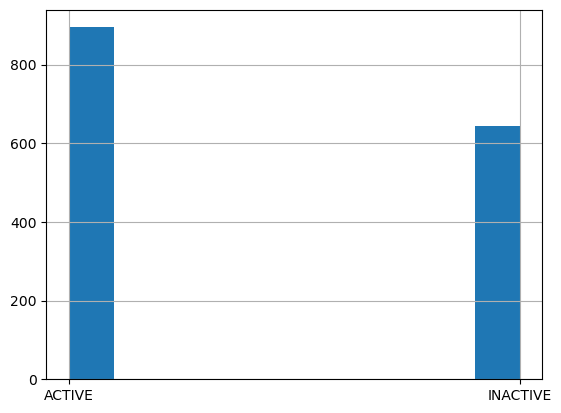

In [16]:
df["class_activity_median_1000"].hist()

<Axes: >

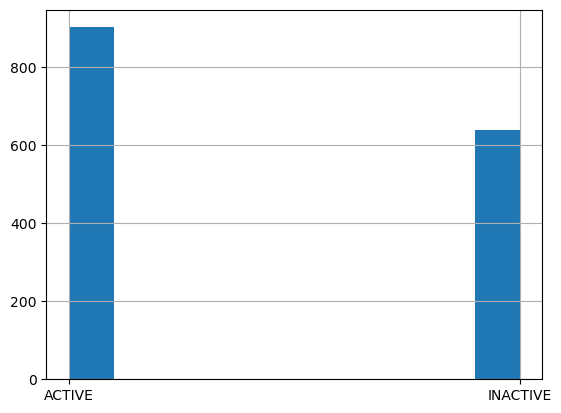

In [17]:
df["class_activity_median_expert_1000"].hist()


In [18]:
df[["class_activity_median_expert_1000", "class_activity_median_1000"]]

,class_activity_median_expert_1000,class_activity_median_1000
0,ACTIVE,ACTIVE
1,ACTIVE,ACTIVE
2,ACTIVE,ACTIVE
3,ACTIVE,ACTIVE
4,ACTIVE,ACTIVE
...,...,...
2323,ACTIVE,ACTIVE
2324,ACTIVE,ACTIVE
2325,INACTIVE,INACTIVE
2326,INACTIVE,INACTIVE


In [19]:
df[["act_median_expert", "act_median"]]

,act_median_expert,act_median
0,5.5,5.5
1,138.5,232.0
2,5.5,5.5
3,5.5,5.5
4,5.5,5.5
...,...,...
2323,26.0,26.0
2324,914.5,914.5
2325,25000.0,25000.0
2326,2570.0,2570.0


In [20]:
df = df.drop(["ass_expert_selection_list"], axis=1)

In [21]:
df["source"] = "IC50"

In [22]:
df.to_csv(DATA_DIR/"processed"/"ar_homo_sapiens_chembl_3.3_more_ChEMBL_columnsIC50.csv_processed_expert.csv", sep=",", index=False)